# Building a Spam Filter with Naive Bayes

In this guided project, we're going to study the practical side of the algorithm by building a spam filter for SMS messages.

To classify messages as spam or non-spam, we saw in the previous mission that the computer:

- Learns how humans classify messages.
- Uses that human knowledge to estimate probabilities for new messages — probabilities for spam and non-spam.
- Classifies a new message based on these probability values — if the probability for spam is greater, then it classifies the message as spam. Otherwise, it classifies it as non-spam (if the two probability values are equal, then we may need a human to classify the message).

So our first task is to "teach" the computer how to classify messages. To do that, we'll use the multinomial Naive Bayes algorithm along with a dataset of 5,572 SMS messages that are already classified by humans.

The dataset was put together by Tiago A. Almeida and José María Gómez Hidalgo, and it can be downloaded from the The UCI Machine Learning Repository.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

sms = pd.read_csv('SMSSpamCollection',sep='\t',header=None,names=['Label','SMS'])
print(sms.shape)
spam_nonspam = sms['Label'].value_counts(normalize=True) * 100
print(spam_nonspam)

(5572, 2)
ham     86.593683
spam    13.406317
Name: Label, dtype: float64


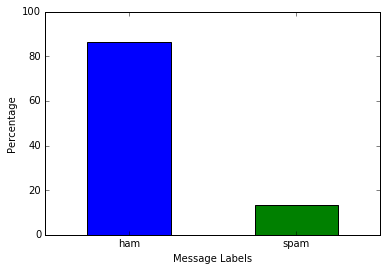

In [2]:
spam_nonspam.plot.bar(ylim=(0,100))
plt.xticks(rotation=0)
plt.xlabel('Message Labels')
plt.ylabel('Percentage')
plt.show()

In [3]:
sms = sms.sample(frac=1,random_state=1)
index = round(len(sms) * 0.8)
training = sms[:index].reset_index(drop=True)
test = sms[index:].reset_index(drop=True)
print(training.shape)
print(test.shape)

(4458, 2)
(1114, 2)


In [4]:
print(training['Label'].value_counts(normalize=True) * 100)

ham     86.54105
spam    13.45895
Name: Label, dtype: float64


In [5]:
print(test['Label'].value_counts(normalize=True) * 100)

ham     86.804309
spam    13.195691
Name: Label, dtype: float64


# Data Cleaning

In [6]:
training['SMS'] = training['SMS'].str.replace('\W',' ')
training['SMS'] = training['SMS'].str.lower()
test['SMS']= test['SMS'].str.replace('\W',' ')
test['SMS'] = test['SMS'].str.lower()

In [7]:
training.head(n=10)

,Label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired
3,ham,havent
4,ham,i forgot 2 ask ü all smth there s a card on ...
5,ham,ok i thk i got it then u wan me 2 come now or...
6,ham,i want kfc its tuesday only buy 2 meals only ...
7,ham,no dear i was sleeping p
8,ham,ok pa nothing problem
9,ham,ill be there on lt gt ok


In [8]:
training['SMS'] = training['SMS'].str.split()
vocabulary = []
for sms in training['SMS']:
    for word in sms:
        vocabulary.append(word)
vocabulary = list(set(vocabulary))
print(vocabulary[:5])

['tree', 'box1146', 'uk', '08718723815', 'ente']


In [9]:
word_counts_per_sms = {unique_word: [0] * len(training['SMS']) for unique_word in vocabulary}

In [10]:
for index,sms in enumerate(training['SMS']):
    for word in sms:
        word_counts_per_sms[word][index] +=1

In [11]:
import random
random.seed(42)
for i in range(10):
    choice = random.randint(0,len(word_counts_per_sms))
    choice_word = list(word_counts_per_sms.keys())[choice]
    print('{} -> {}'.format(choice_word,word_counts_per_sms[choice_word]))
    

hunting -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [12]:
import pandas as pd
word_counts = pd.DataFrame(word_counts_per_sms)

In [13]:
word_counts.head(n=5)

,0,00,000,000pes,008704050406,0089,01223585334,02,0207,02072069400,...,zindgi,zoe,zogtorius,zouk,zyada,é,ú1,ü,〨ud,鈥
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [14]:
training = training.join(word_counts)
training.head(n=5)

,Label,SMS,0,00,000,000pes,008704050406,0089,01223585334,02,...,zindgi,zoe,zogtorius,zouk,zyada,é,ú1,ü,〨ud,鈥
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [15]:
training[['SMS','pretty']].head(n=5)

,SMS,pretty
0,"[yep, by, the, pretty, sculpture]",1
1,"[yes, princess, are, you, going, to, make, me,...",0
2,"[welp, apparently, he, retired]",0
3,[havent],0
4,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0


# Calculating Constant Parameters for Naive Bayes

In [16]:
training['Num Words'] = training['SMS'].apply(len)

In [17]:
training['Num Words'].head(n=5)

0     5
1     9
2     4
3     1
4    26
Name: Num Words, dtype: int64

In [18]:
N_spam = training[training['Label'] == 'spam']['Num Words'].sum()
N_ham = training[training['Label'] == 'ham']['Num Words'].sum()
#Laplace smooting
alpha = 1
#Total words in Vocabulary
N_vocabulary = len(vocabulary)
#P(Spam) and P(Ham)
P_spam = len(training[training['Label'] == 'spam'])/ len(training)
P_ham = len(training[training['Label'] == 'ham']) / len(training)

In [19]:
print('Probability of Spam : {:.6f}'.format(P_spam))
print('Probability of Ham : {:.6f}'.format(P_ham))
print('Number of words in Spam : {:,}'.format(N_spam))
print('Number of words in Ham: {:,}'.format(N_ham))
print('Number of words in Vocabulary: {:,}'.format(N_vocabulary))
print('Alpha : {}'.format(alpha))

Probability of Spam : 0.134590
Probability of Ham : 0.865410
Number of words in Spam : 15,190
Number of words in Ham: 57,237
Number of words in Vocabulary: 7,783
Alpha : 1


# Calculating each words probabilities for Ham and Spam messages

In [20]:
spam_word_probabilities = {unique_word: 0 for unique_word in vocabulary}
ham_word_probabilities = {unique_word: 0 for unique_word in vocabulary}
spam_messages = training[training['Label'] == 'spam']
ham_messages = training[training['Label'] == 'ham']
for word in vocabulary:
    num_words_spam = spam_messages[word].sum()
    num_words_ham = ham_messages[word].sum()
    p_word_spam = (num_words_spam + alpha)/(N_spam + (alpha * N_vocabulary))
    p_word_ham = (num_words_ham + alpha)/(N_ham + (alpha * N_vocabulary))
    spam_word_probabilities[word] = p_word_spam
    ham_word_probabilities[word] = p_word_ham

# Classify Messages

In [25]:
import re

def classify(message):
    message =  re.sub('\W',' ',message)
    message = message.lower()
    message = message.split()
    
    p_spam_given_message = P_spam
    p_ham_given_message = P_ham
    
    for word in message:
        if word in spam_word_probabilities:
            p_spam_given_message *= spam_word_probabilities[word]
        if word in ham_word_probabilities:
            p_ham_given_message *= ham_word_probabilities[word]
    
    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_ham_given_message < p_spam_given_message:
        return 'spam'
    else:
        return 'needs human classification'

In [26]:
print(classify('WINNER!! This is the secret code to unlock the money: C3421.'))
print(classify("Sounds good, Tom, then see u there"))

spam
ham


# Classification on Test set

In [27]:
test['predicted'] = test['SMS'].apply(classify)
test.head()

,Label,SMS,predicted
0,ham,later i guess i needa do mcat study too,ham
1,ham,but i haf enuff space got like 4 mb,ham
2,spam,had your mobile 10 mths update to latest oran...,spam
3,ham,all sounds good fingers makes it difficult ...,ham
4,ham,all done all handed in don t know if mega sh...,ham


In [ ]:
correct = 0
total = len(test)
test['same'] = test['Label'] == test['predicted']
correct = test['same'].sum()
accuracy = correct * 100 /total
print(accuracy)

# Conclusion

In this project, we managed to build a spam filter for SMS messages using the multinomial Naive Bayes algorithm. The filter had an accuracy of 98.74% on the test set, which is an excellent result. We initially aimed for an accuracy of over 80%, but we managed to do way better than that.

##### Next Steps

- Isolate the 14 messages that were classified incorrectly and try to figure out why the algorithm reached the wrong conclusions.
- Make the filtering process more complex by making the algorithm sensitive to letter case.